Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
print(f"Shape of wine data: {wine_df.shape}")

Shape of wine data: (178, 14)


In [4]:
#check for missing values
wine_df.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

No missing values...

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [6]:
wine_df['WineVariety'].value_counts()

1    71
0    59
2    48
Name: WineVariety, dtype: int64

In [7]:
wine_features = wine_df.drop(['WineVariety'], axis=1).values
wine_label = wine_df['WineVariety'].values

* Boxplot to show relationship of columns with WineVariety

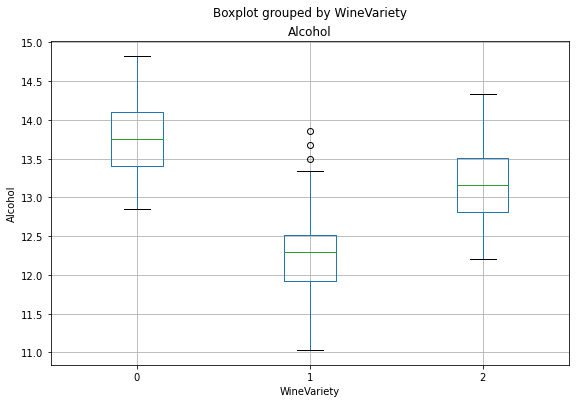

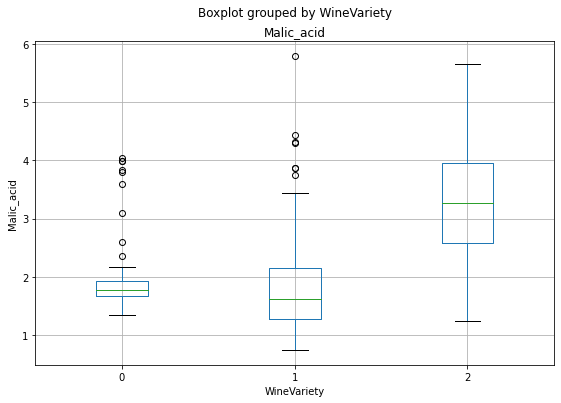

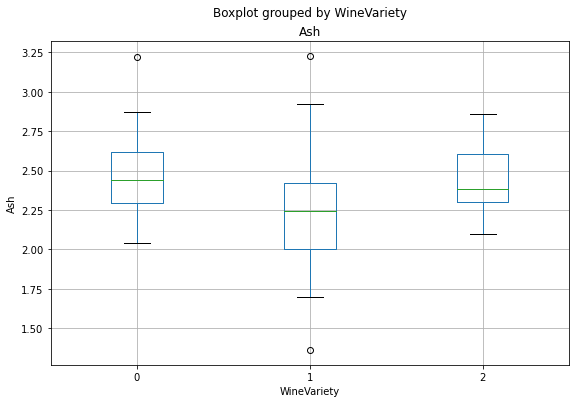

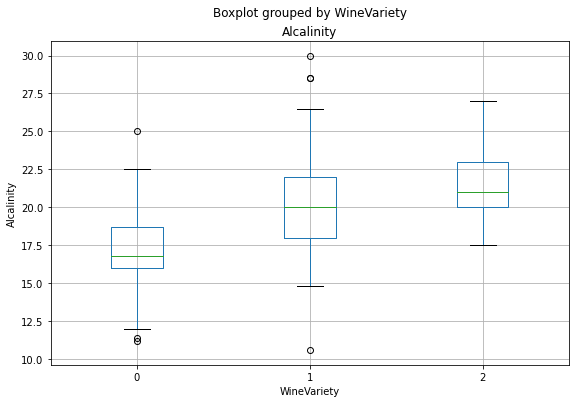

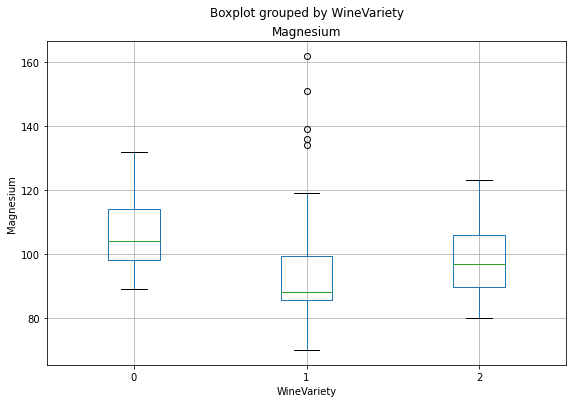

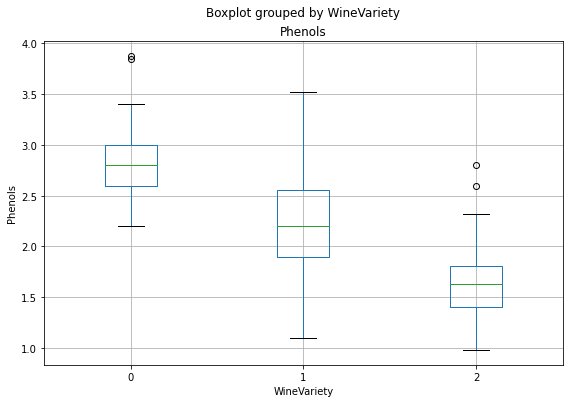

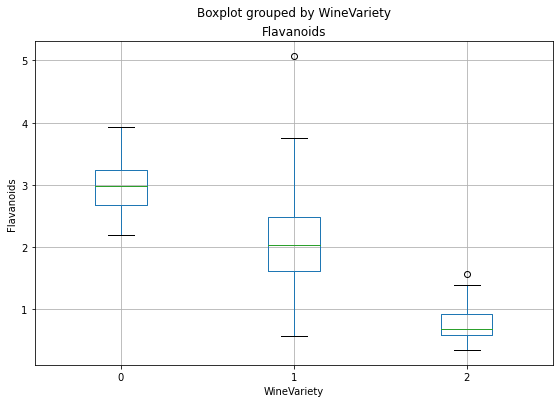

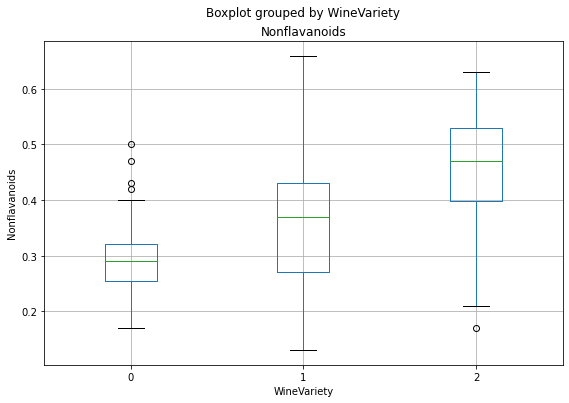

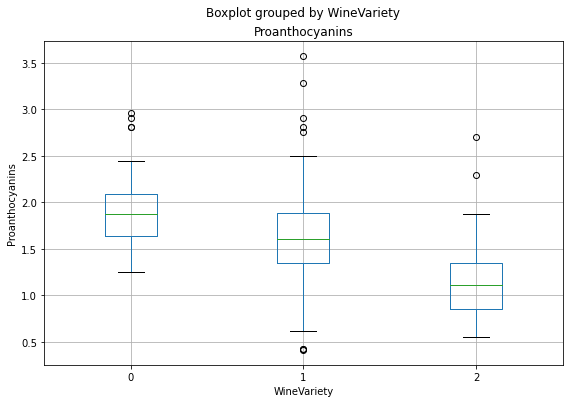

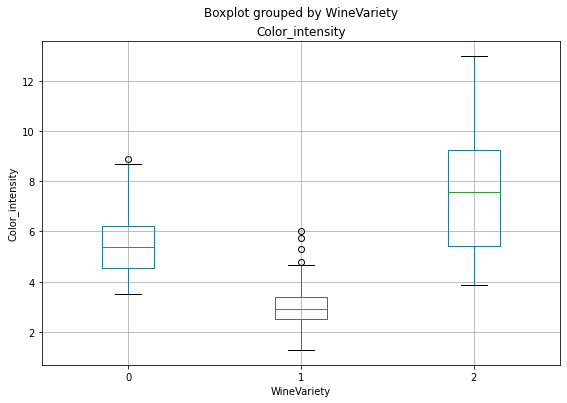

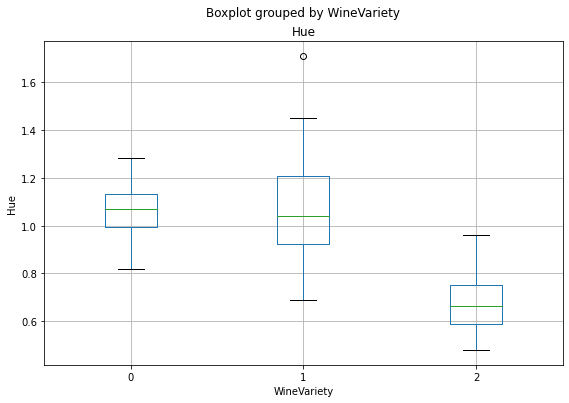

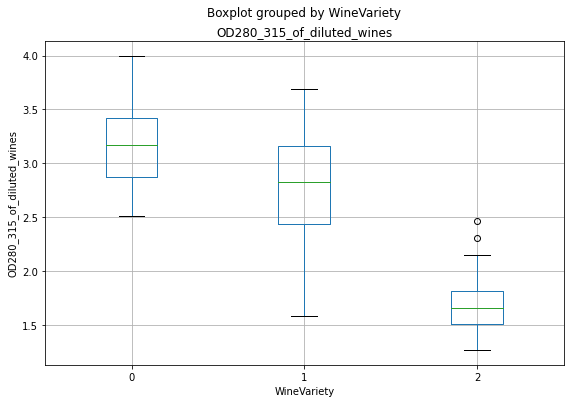

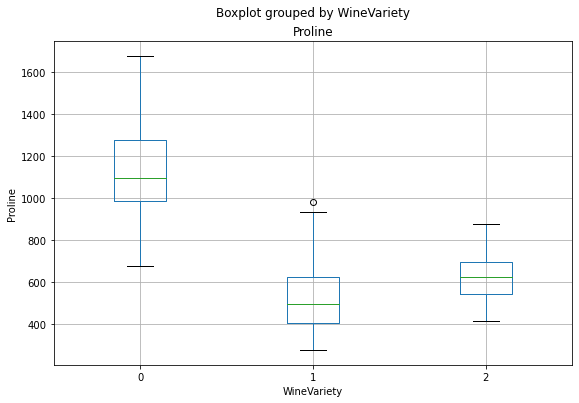

In [8]:
for col in wine_df.drop('WineVariety',axis=1).columns:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    wine_df.boxplot(column=col, by='WineVariety', ax=ax)
    ax.set_ylabel(col)
    #ax.set_title('Boxplot of Rentals by {}'.format(col))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_label, test_size=0.3, stratify=wine_label, random_state=16)

In [11]:
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")

Shape of X_train: (124, 13), Shape of X_test: (54, 13)


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import classification_report, recall_score, confusion_matrix

In [14]:
logistic_model = LogisticRegression(multi_class='auto',max_iter=10000)
logistic_model.fit(X_train,y_train)

logistic_predictions = logistic_model.predict(X_test)

In [15]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [16]:
print(f"Recall score: {recall_score(y_test, logistic_predictions, average='macro')}")

Recall score: 0.9682539682539683


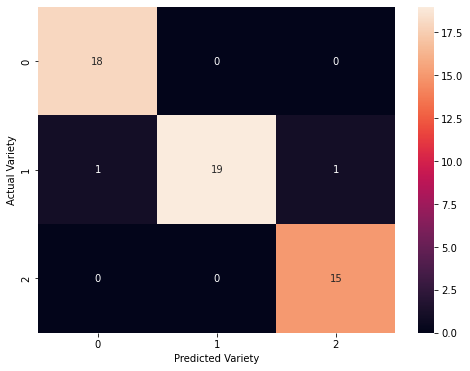

In [17]:
# Plot the confusion matrix

cnf = confusion_matrix(y_test,logistic_predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cnf,annot=True)
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")

plt.show()

#### Lets scale to see if we get a better performance

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

log_reg_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Model is perfect with scaling

#### Creating a piepline for the process.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
#preprocessing
numeric_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ])

#Preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ],verbose=True)

#training pipeline
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())],verbose=True)

#fit the pipeline
model_pipe = pipeline.fit(X_train, y_train)
print(model_pipe)

[ColumnTransformer] ........... (1 of 1) Processing num, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   verbose=True)),
                ('classifier', LogisticRegression())],
         verbose=True)


In [21]:
model_pipe_predictions = model_pipe.predict(X_test)

print(classification_report(y_test, model_pipe_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [22]:
import joblib

# Saving the model as a pickle file
filename = './wine_model.pkl'
joblib.dump(model_pipe, filename)

['./wine_model.pkl']

### NEW DATA OBSERVATION

* Use the model with new data observation
* When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

* [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285], [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]

In [23]:
new_data = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                    [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

In [24]:
wine_model = joblib.load('wine_model.pkl')

predictions = wine_model.predict(new_data)
print(predictions)
print(f"First sample belongs to WineVariety {predictions[0]}")
print(f"Second sample belongs to WineVariety {predictions[1]}")

[0 1]
First sample belongs to WineVariety 0
Second sample belongs to WineVariety 1
